# Twitter API v2

**Tutorial:** https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a


**Steps**

1. Introduction
2. Prerequisites to Start
3. Bearer Token
4. Create Headers
5. Create URL
	- search url
	- query params
6. Connect to Endpoint
7. Call the API endpoint
	- data
	- meta
8. Save Results to CSV
9. Looping Through Requests

> If we just send a request to collect tweets between the 1st of January 2020 and the 31st of December 2020, we will hit our cap very quickly without having a good distribution from all 12 months.
So what we can do is, we can set a limit for tweets we want to collect per month, so that if we reach the specific cap at one month, we move on to the next one.

* A For-loop that goes over the months/weeks/days we want to cover (Depending on how it is set)

* A While-loop that controls the maximum number of tweets we want to collect per time period.

* Notice that a time.sleep() is added between calls to ensure you are not just spamming the API with requests.

In [1]:
# 2. Prerequisites to Start

# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

import yaml

## Tweets Count

In [4]:
# Bearer token
def auth():
    with open("../../config.yaml") as file:
        passwords = yaml.safe_load(file)
    return passwords["search_tweets_api"]["bearer_token"]

bearer_token = auth()

search_url = "https://api.twitter.com/2/tweets/counts/all"

# Optional params: start_time, end_time, since_id, until_id, next_token, granularity
# Vizag gas leak -is:retweet
query_params = {'query': '(audiusproject OR audius OR $audio OR audiocoin) lang:en -is:retweet -is:reply',
                'granularity': 'day', 
                'start_time': '2021-01-01T00:00:00.000Z', 
                'end_time': '2021-08-31T00:00:00.000Z'
               }


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveTweetCountsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


json_response = connect_to_endpoint(search_url, query_params)
res = json.dumps(json_response, indent=4, sort_keys=True)
print(res)

200
{
    "data": [
        {
            "end": "2021-08-01T00:00:00.000Z",
            "start": "2021-07-31T00:00:00.000Z",
            "tweet_count": 149
        },
        {
            "end": "2021-08-02T00:00:00.000Z",
            "start": "2021-08-01T00:00:00.000Z",
            "tweet_count": 140
        },
        {
            "end": "2021-08-03T00:00:00.000Z",
            "start": "2021-08-02T00:00:00.000Z",
            "tweet_count": 159
        },
        {
            "end": "2021-08-04T00:00:00.000Z",
            "start": "2021-08-03T00:00:00.000Z",
            "tweet_count": 126
        },
        {
            "end": "2021-08-05T00:00:00.000Z",
            "start": "2021-08-04T00:00:00.000Z",
            "tweet_count": 160
        },
        {
            "end": "2021-08-06T00:00:00.000Z",
            "start": "2021-08-05T00:00:00.000Z",
            "tweet_count": 203
        },
        {
            "end": "2021-08-07T00:00:00.000Z",
            "start": "2021-08-06T00

## Tweets Search

In [5]:
# 3. Bearer token
def auth():
    with open("../../config.yaml") as file:
        passwords = yaml.safe_load(file)
    return passwords["search_tweets_api"]["bearer_token"]

In [6]:
# 4. Create Headers
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [7]:
# 5. Create url
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'tweet.fields': 'id,text,author_id,created_at,public_metrics',
                    # 'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    # 'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    # 'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    # 'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [8]:
# 6. Connect to endpoint
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [9]:
## // Inputs for the request //
bearer_token = auth()
headers = create_headers(bearer_token)

# keyword = "ethereum -is:retweet lang:en"
# keyword = "Vizag gas leak"
# keyword = "(numerai OR $NMR OR NMRUSDT) -is:retweet -is:reply lang:en"
keyword = "(audiusproject OR audius OR $audio OR audiocoin) lang:en -is:retweet -is:reply"
start_time = "2021-01-01T23:00:00.000Z"
end_time = "2021-01-02T00:00:00.000Z"
max_results = 10

In [10]:
## // Call the API //
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])
print(json.dumps(json_response, indent=4, sort_keys=True))

Endpoint Response Code: 200
{
    "data": [
        {
            "author_id": "1250806211555086336",
            "created_at": "2021-01-01T23:59:12.000Z",
            "id": "1345157661130678273",
            "public_metrics": {
                "like_count": 1,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "bloom is now on audius as well \n\nhttps://t.co/EbgaB4bJXG"
        },
        {
            "author_id": "746090350347948032",
            "created_at": "2021-01-01T23:44:00.000Z",
            "id": "1345153833283035144",
            "public_metrics": {
                "like_count": 7,
                "quote_count": 1,
                "reply_count": 1,
                "retweet_count": 3
            },
            "text": "Beyond\nhttps://t.co/JnQ2446AJu\n@AudiusProject #Audius \n#Music #Blockchain #BerlinSchool #Synthwave #EDM #Techno #Dance #Electronic #Retro #80s #Psychedelic #Art #Culture

In [15]:
## Save Results
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Tweet ID
        tweet_id = tweet['id']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        # 'author_id', 'created_at', 'tweet_id', 'text', 'like_count', 'quote_count', 'reply_count', 'retweet_count'
        res = [author_id, created_at, tweet_id, text, like_count, quote_count, reply_count, retweet_count]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

In [ ]:
# Create file
csvFile = open("vizag_gas_leak_twitter_api.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow([ 'author_id', 'created_at', 'tweet_id', 'text', 'like_count', 'quote_count', 'reply_count', 'retweet_count'])
csvFile.close()

append_to_csv(json_response=json_response, fileName="vizag_gas_leak_twitter_api.csv")

In [ ]:
## // Store collected tweets in a pickle file //

# import pandas as pd
# from pandas import json_normalize 
# df = json_normalize(json_response, 'data')
# display(df)
# print(df.columns)
# df.to_pickle('data/collected_tweets.pkl')
# df = pd.read_pickle('data/collected_tweets.pkl')

In [ ]:
## // Store the data in Human readable format (collected_tweets.txt) // 
# but also store the data in a pickle dataframe ready to be processed using pandas.

# keys = json_response["data"][0].keys()
# print(keys)

# with open('../data/collected_tweets.txt', 'a') as outfile:
#     for i in range(len(json_response["data"])):
#         json.dump(json_response["data"][i], outfile)
#         outfile.write('\n')

# Pagination (Loops)

In [ ]:
# [*range(1, 29)]

In [ ]:
# date_list = []

# for year in [2020,2021]:
    
#     for month in range(1, 13):

#         if month==2:
#             for day in range(1, 29):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

#         elif month in [4,6,9,11]:
#             for day in range(1, 31):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

#         elif month in [1,3,5,7,8,10,12]:
#             for day in range(1, 32):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

# print(f"Total timestamps: {len(date_list)}")

In [ ]:
# date_list = []

# for year in [2020,2021]:
#     for month in range(1, 13):
#         month = str(month).zfill(2)
#         date = f"{year}-{month}-00T00:00:00.000Z"
#         # print(date)
#         date_list.append(date)

# print(f"Total timestamps: {len(date_list)}")

In [ ]:
## Create start_list and end_list

# start_list = date_list
# end_list = date_list[1:]


In [ ]:
# start_list =    ['2020-05-07T00:00:00.000Z',
#                  '2020-05-08T00:00:00.000Z',
#                  '2020-05-09T00:00:00.000Z',
#                  '2020-05-10T00:00:00.000Z',
#                  '2020-05-11T00:00:00.000Z',
#                  '2020-05-12T00:00:00.000Z']

# end_list =      ['2020-05-08T00:00:00.000Z',
#                  '2020-05-09T00:00:00.000Z',
#                  '2020-05-10T00:00:00.000Z',
#                  '2020-05-11T00:00:00.000Z',
#                  '2020-05-12T00:00:00.000Z',
#                  '2020-05-13T00:00:00.000Z']

In [11]:
start_list = ['2020-01-01T00:00:00.000Z']
end_list = ['2021-08-31T00:00:00.000Z']

In [12]:
## Sanity check
pd.DataFrame(data = {"start":start_list[:20],
                    "end":end_list[:20]})

,start,end
0,2020-01-01T00:00:00.000Z,2021-08-31T00:00:00.000Z


In [13]:
print("starting timestamp:", start_list[0])
print("ending timestamp:", end_list[-1])

starting timestamp: 2020-01-01T00:00:00.000Z
ending timestamp: 2020-01-01T00:00:00.000Z


In [17]:
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "(audiusproject OR audius OR $audio OR audiocoin) lang:en -is:retweet -is:reply"
datafile = "../../data/AUDIO_twitter_api.csv"

max_results = 500 # total results per API call


#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(datafile, "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

# (Only the first time)
# Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author_id', 'created_at', 'tweet_id', 'text',
                    'like_count', 'quote_count', 'reply_count', 'retweet_count'])

csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 2_000_000 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, datafile)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(2)                
        
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, datafile)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(2)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        
        time.sleep(2)
        
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdp6o6o8kihjs2z68b9s1nbgijxx9
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  495
Total # of Tweets added:  495
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdp6o6o8kihjs2z68b9s1nbgijxx9
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdp6nw1i43cm9w0zz97wxmxf8jo1p
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  496
Total # of Tweets added:  991
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdp6nw1i43cm9w0zz97wxmxf8jo1p
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdp6911ehqemf3pz55rbrc5l0hhtp
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  490
Total # of Tweets added:  1481
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdp6911ehqemf3pz55rbrc5l0hhtp
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdp68qd5x4r7h8us3ltd815ho0wot
Sta

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdj8swqd64iydo86ab20sm4scb725
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  497
Total # of Tweets added:  14332
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdj8swqd64iydo86ab20sm4scb725
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdj8shvzd71mwjxgiegqy1qrshful
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  498
Total # of Tweets added:  14830
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdj8shvzd71mwjxgiegqy1qrshful
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdj8dr4q4iia7kxe2j1f9p8t7wynx
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  496
Total # of Tweets added:  15326
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdj8dr4q4iia7kxe2j1f9p8t7wynx
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdj7ypsu4i8hwer13zo47i86y2rnh
Start Date:  2020-01-01T00:00:0

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foswqk3o8zpvi8ga02er02ufkvzqt9
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  496
Total # of Tweets added:  28236
-------------------
-------------------
Token:  b26v89c19zqg8o3foswqk3o8zpvi8ga02er02ufkvzqt9
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fostukwsgokt1gdedxfqt0ordsx4sd
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  498
Total # of Tweets added:  28734
-------------------
-------------------
Token:  b26v89c19zqg8o3fostukwsgokt1gdedxfqt0ordsx4sd
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fostukk1ws8dueg2bo1vcophntmcfx
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  497
Total # of Tweets added:  29231
-------------------
-------------------
Token:  b26v89c19zqg8o3fostukk1ws8dueg2bo1vcophntmcfx
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fostu5p2ea2u81uqaruad2q0swgdj1
Start Date:  2020-01-01T00:00:0

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosqtjm25yz8xg4kfyj6mt4qbb3o8t
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  497
Total # of Tweets added:  42069
-------------------
-------------------
Token:  b26v89c19zqg8o3fosqtjm25yz8xg4kfyj6mt4qbb3o8t
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosqtjfne48dydpux5z1bykgsa2rnh
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  491
Total # of Tweets added:  42560
-------------------
-------------------
Token:  b26v89c19zqg8o3fosqtjfne48dydpux5z1bykgsa2rnh
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosqtj98wua2tb4svtyrq164stsgot
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  493
Total # of Tweets added:  43053
-------------------
-------------------
Token:  b26v89c19zqg8o3fosqtj98wua2tb4svtyrq164stsgot
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosqt4ikyhx2aektwi9pw0c6bxfgxp
Start Date:  2020-01-01T00:00:0

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foskuu0xluodosbmy7oxmmuza2jgql
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  477
Total # of Tweets added:  55323
-------------------
-------------------
Token:  b26v89c19zqg8o3foskuu0xluodosbmy7oxmmuza2jgql
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosktzya4rm7vs3g1nbtood2zmg9kt
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  488
Total # of Tweets added:  55811
-------------------
-------------------
Token:  b26v89c19zqg8o3fosktzya4rm7vs3g1nbtood2zmg9kt
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosktkoeq7qghj1mzdbj8vw39rzibh
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  490
Total # of Tweets added:  56301
-------------------
-------------------
Token:  b26v89c19zqg8o3fosktkoeq7qghj1mzdbj8vw39rzibh
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foskt5cd3wkjy8zf1vpc90b8axw131
Start Date:  2020-01-01T00:00:0

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosbu94jzqx77wy7pkhbq4jy2z2um5
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  489
Total # of Tweets added:  68945
-------------------
-------------------
Token:  b26v89c19zqg8o3fosbu94jzqx77wy7pkhbq4jy2z2um5
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosbu8ngzp5axujd44si55bkx70xvh
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  493
Total # of Tweets added:  69438
-------------------
-------------------
Token:  b26v89c19zqg8o3fosbu8ngzp5axujd44si55bkx70xvh
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosbttm603yu4k6xy94xmimkqrcd4t
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  493
Total # of Tweets added:  69931
-------------------
-------------------
Token:  b26v89c19zqg8o3fosbttm603yu4k6xy94xmimkqrcd4t
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosbter7olelh3ob0rfzx3ai7z5r3x
Start Date:  2020-01-01T00:00:0

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fo7delk58sbvlf7xt3q5j2lxgqsi2l
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  497
Total # of Tweets added:  82775
-------------------
-------------------
Token:  b26v89c19zqg8o3fo7delk58sbvlf7xt3q5j2lxgqsi2l
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fo7dcwkxpszxdeo0w8twcj0ow1vptp
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  496
Total # of Tweets added:  83271
-------------------
-------------------
Token:  b26v89c19zqg8o3fo7dcwkxpszxdeo0w8twcj0ow1vptp
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fo7aeemrked68xzs5xnmk7lss4hw8t
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  495
Total # of Tweets added:  83766
-------------------
-------------------
Token:  b26v89c19zqg8o3fo7aeemrked68xzs5xnmk7lss4hw8t
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fo77gb0fvncca4rqb0h39ampkbbt6l
Start Date:  2020-01-01T00:00:0

# EDA collected dataset

In [18]:
import numpy as np
import pandas as pd

In [19]:
print("Dataset:", datafile)
df = pd.read_csv(datafile)

Dataset: ../../data/audio_twitter_api.csv


In [20]:
df.shape

(86510, 8)

In [21]:
df.head()

,author_id,created_at,tweet_id,text,like_count,quote_count,reply_count,retweet_count
0,1401095996520677381,2021-08-30 23:55:45+00:00,1432492267772723200,MEME GAMES looks ready to pump x10 in 1 move 🚀...,3,0,1,1
1,2439046681,2021-08-30 23:49:46+00:00,1432490760327372803,"Monkey find, monkey share. 🍌 \n⁦@SolanaMBS⁩\n⁦...",13,3,27,1
2,744638096428441600,2021-08-30 23:42:49+00:00,1432489012153946114,Pray for me baby Jesus. I just finished this @...,2,0,0,1
3,1269391265403211777,2021-08-30 23:40:28+00:00,1432488418894884864,#NewMusic makes a Monday a lot better!!- #DRE...,1,0,0,0
4,54424724,2021-08-30 23:34:28+00:00,1432486910753067009,Ah! So good. Must listen today: @Cooopahtroopa...,0,0,0,1


In [22]:
total_tweets = len(df)
unique_authors = df["author_id"].nunique()
print(f'There are {unique_authors} unique authors for {total_tweets} total tweets ({np.round(unique_authors/total_tweets,2)}).')

There are 20338 unique authors for 86510 total tweets (0.24).


In [34]:
print("First date", df["created_at"].min())
print("Last date:", df["created_at"].max())

First date 2020-01-01 00:31:18+00:00
Last date: 2021-08-30 23:55:45+00:00


## WordCloud

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# WordCloud?

In [25]:
# Concatanate tweets on a single string
text = " ".join(txt for txt in df["text"])
total_words = len(text)
print (f"There are {total_words} words in the combination of all tweets.")

# Lower case the words
text = text.lower()

unique_words = set(text)
total_unique_words = len(unique_words)
print (f"The unique words are {total_unique_words}")

There are 12486443 words in the combination of all tweets.
The unique words are 2098


In [26]:
text[:10_000]

"meme games looks ready to pump x10 in 1 move 🚀\n\n➡️ 2m mcap\n\n🌐https://t.co/6tohi2a4r0 \n\nhttps://t.co/b5nwofceyz\n\n$audio $mana $joe $cgg $pvu $ufo $axs $shib $enj $alice $rare $zoo $ern $ilv $ygg $super $egld #nft #gamefi $tower $mbox $skill $torn $sol $sps $spell $erowan $ntvrk https://t.co/xamiwwoabu monkey find, monkey share. 🍌 \n\u2066@solanambs\u2069\n\u2066@monke_dao\u2069\n\nmonkeys chill by smb on audius https://t.co/yl241zfzoo pray for me baby jesus. i just finished this @kayzomusic remix for the comp and oof i hope they like it.\ncheck it out on audius september 2nd!! #newmusic makes a monday a lot better!!-  #dreams \n\n#jeauxydee #singers #beats #pop #guitar #piano #videos #insta @jonasbrothers @marshmellomusic @harry_styles @shawnmendes @beatstars @audiusproject @soundcloud https://t.co/rz2izghtzb ah! so good. must listen today: @cooopahtroopa @indexcoop @audiusproject #dao #nft $index https://t.co/4krlde63kn uploaded our track from the transcending online 2 compila

In [27]:
unique_words

{'🍎',
 'e',
 '🔂',
 '∇',
 '中',
 '⏴',
 '𝒎',
 '🐎',
 '🖤',
 '👶',
 '𝘖',
 'ₒ',
 '𝘌',
 'ｄ',
 '국',
 '💬',
 '▪',
 '少',
 '🎻',
 '💌',
 '坊',
 'ナ',
 'ふ',
 'π',
 '🙀',
 '𝟔',
 '和',
 '▒',
 '璃',
 '\U0001f7e6',
 '0',
 '𝗡',
 '𝑖',
 '💰',
 '解',
 'п',
 '太',
 '𝟬',
 '𝕨',
 'ｍ',
 '𓀠',
 'す',
 '樂',
 '⛷',
 '🥽',
 '❆',
 'ย',
 '𝗛',
 '@',
 '🆅',
 '\U0001f9a5',
 '🧭',
 'ل',
 '蜂',
 '⤷',
 '🎺',
 '點',
 '⚡',
 '園',
 '配',
 '☝',
 '🇽',
 '👝',
 'に',
 '😸',
 '🏜',
 '🍩',
 'ᵒ',
 'ś',
 'り',
 '📩',
 '🐈',
 '나',
 '⛈',
 '̵',
 '𝓦',
 '⏱',
 '비',
 'b',
 '‡',
 '𝖑',
 '🛵',
 '💘',
 'à',
 '🤪',
 'đ',
 '悪',
 '·',
 '🤷',
 'ᕮ',
 '◑',
 '🐓',
 '《',
 '妓',
 '𝔨',
 '🄷',
 '🌙',
 '⇨',
 '⌣',
 'ك',
 '¢',
 '_',
 '❌',
 'å',
 '🆘',
 '恭',
 '＾',
 'g',
 '인',
 '😇',
 'β',
 'ğ',
 'ʸ',
 '🚄',
 '🕳',
 '🏃',
 '目',
 '😀',
 '\U0001faa4',
 '𝑒',
 'ₚ',
 '🎨',
 '🤬',
 '𝙖',
 '🥺',
 '⚪',
 '🛍',
 '♡',
 '⏫',
 '🌜',
 '🏁',
 '🤹',
 "'",
 '⭐',
 '🎯',
 '＇',
 '🐅',
 '}',
 '📆',
 'ñ',
 '⏰',
 '⛺',
 '𝔪',
 '\U0001f972',
 '\n',
 '𝘤',
 'ɾ',
 '▹',
 '后',
 'ค',
 '🔐',
 '𝗣',
 '😱',
 '⛧',
 '▶',
 '🦏',
 '𝕜',
 '\U000e007f',
 '…',


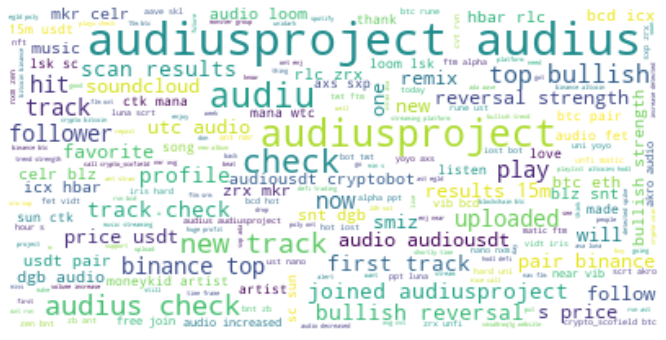

In [28]:
# Create stopword list and update it with other common words
stopwords = set(STOPWORDS)
stopwords.update(["amp", "https", "t", "co", "t co",
                  "https t"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Most common words
wordcloud.words_

{'audiusproject audius': 1.0,
 'audiusproject': 0.6485976267529665,
 'audiu': 0.5256742179072276,
 'check': 0.49859762675296654,
 'new track': 0.3597626752966559,
 'audius check': 0.3518338727076591,
 'top bullish': 0.2696871628910464,
 'binance top': 0.22459546925566343,
 'play': 0.21882416396979504,
 'follower': 0.20711974110032363,
 'hit': 0.20275080906148868,
 'uploaded': 0.2011326860841424,
 'now': 0.19789644012944985,
 'track': 0.18818770226537218,
 'profile': 0.16024811218985976,
 'joined audiusproject': 0.1493527508090615,
 'first track': 0.1429881337648328,
 'scan results': 0.13592233009708737,
 'bullish reversal': 0.13435814455231931,
 'track check': 0.1290722761596548,
 'favorite': 0.11618122977346278,
 'pair binance': 0.11375404530744336,
 'reversal strength': 0.11186623516720604,
 'one': 0.11116504854368932,
 'new': 0.10787486515641856,
 'will': 0.10744336569579288,
 'smiz': 0.10560949298813377,
 'results 15m': 0.10323624595469255,
 'soundcloud': 0.102319309600863,
 'audio